<a href="https://colab.research.google.com/github/abhilash2272/DecisionTreeClassifier/blob/main/DcisionTreeClassifier_bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bank_marketing_dataset.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df=df[['age','job','balance','loan','contact']]
df.head()

,age,job,balance,loan,contact
0,59,admin.,2343,no,unknown
1,56,admin.,45,no,unknown
2,41,technician,1270,no,unknown
3,55,services,2476,no,unknown
4,54,admin.,184,no,unknown


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df.head()

,age,job,balance,loan,contact
0,59,0,2343,0,2
1,56,0,45,0,2
2,41,9,1270,0,2
3,55,7,2476,0,2
4,54,0,184,0,2


In [ ]:
x=df.drop('loan',axis=1)
y=df['loan']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.8768472906403941


[[1951    9]
 [ 266    7]]


<Axes: >

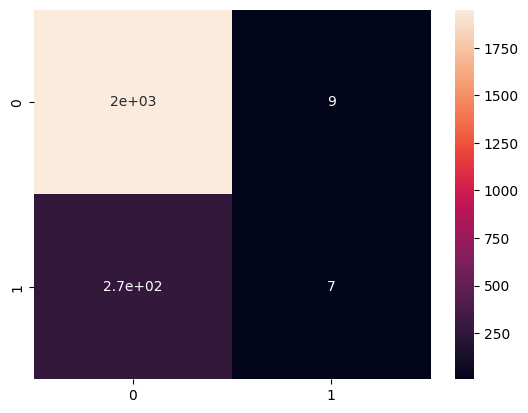

In [ ]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

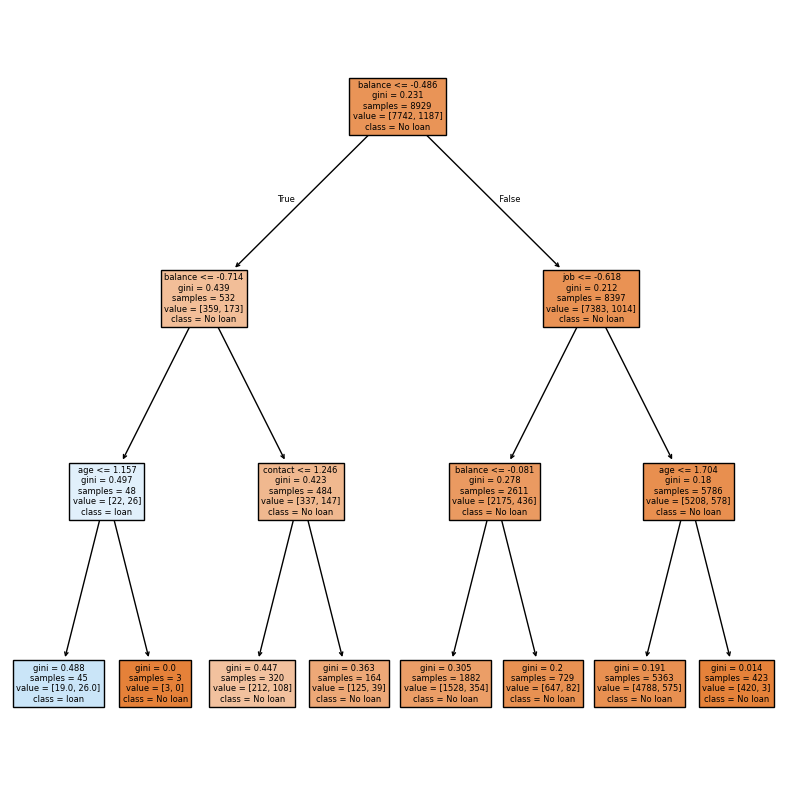

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(classifier,filled=True,feature_names=x.columns,class_names=["No loan","loan"])
plt.show()